## Regression

In this lecture, I will bring together various techniques for feature engineering that we have covered in this course to tackle a regression problem. This would give you an idea of the end-to-end pipeline to build machine learning algorithms for regression.

===================================================================================================

## Real Life example: 

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Save it to a directory of your choice.

For the Kaggle submission, download also the 'test.csv' file, which is the one we need to score and submit to Kaggle. Rename the file to 'house_price_submission.csv'

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook and name the file 'houseprice.csv' then you can load it the same way I will load it below.

====================================================================================================

## House Prices dataset

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
# load dataset
data = pd.read_csv('houseprice.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Load the dataset for submission (the one on which our model will be evaluated by Kaggle)
# it contains exactly the same variables, but not the target

submission = pd.read_csv('house_price_submission.csv')
submission.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The House Price dataset is bigger than the Titanic dataset. It contains more variables for each one of the houses. Thus, manual inspection of each one of them is a bit time demanding. Therefore, here instead of deciding variable by variable what is the best way to proceed, I will try to automate the feature engineering pipeline, making some a priori decisions on when I will apply one technique or the other, and then expanding them to the entire dataset.

### Types of variables (section 2)

Let's go ahead and find out what types of variables there are in this dataset

In [4]:
# let's inspect the type of variables in pandas
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

In [5]:
# we also have an Id variable, that we shoulld not use for predictions:

print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

#### Find categorical variables

In [6]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


#### Find temporal variables

There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:


In [7]:
# make a list of the numerical variables first
numerical = [var for var in data.columns if data[var].dtype!='O']

# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold for example. We are going to do that in the feature engineering section. 

We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:

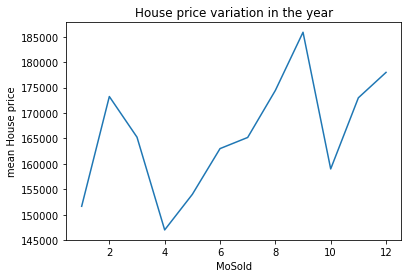

In [9]:
data.groupby('MoSold')['SalePrice'].median().plot()
plt.title('House price variation in the year')
plt.ylabel('mean House price')

The price seems to vary depending on the time of the year in which the house is sold. This information will be captured when we engineer this variable later on.


#### Find discrete variables

To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [10]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(data[var].unique())<20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


#### Continuous variables

In [11]:
# find continuous variables
# let's remember to skip the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 18 numerical and continuous variables


Perfect!! Now we have inspected and have a view of the different types of variables that we have in the house price dataset. Let's move on to understand the types of problems that these variables have.

### Types of problems within the variables (section 3)

#### Missing values

In [12]:
# let's visualise the percentage of missing values for each variable
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

LotFrontage 0.177397260274
Alley 0.937671232877
MasVnrType 0.00547945205479
MasVnrArea 0.00547945205479
BsmtQual 0.0253424657534
BsmtCond 0.0253424657534
BsmtExposure 0.0260273972603
BsmtFinType1 0.0253424657534
BsmtFinType2 0.0260273972603
Electrical 0.000684931506849
FireplaceQu 0.472602739726
GarageType 0.0554794520548
GarageYrBlt 0.0554794520548
GarageFinish 0.0554794520548
GarageQual 0.0554794520548
GarageCond 0.0554794520548
PoolQC 0.995205479452
Fence 0.807534246575
MiscFeature 0.96301369863


In [13]:
# let's no determine how many variables we have with missing information

vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  19


There are quite a few variables with missing information. And they differ in the percentage of observations for which information are missing. 
Let's go ahead and inspect those variables that show missing information for most of their observations.

In [14]:
# let's inspect the type of those variables with a lot of missing information
for var in data.columns:
    if data[var].isnull().mean()>0.80:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


The variables that contain a lot of missing data are categorical variables. We will need to fill those out later in the feature engineering section.

#### Outliers

In [15]:
# let's look at the numerical variables
numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

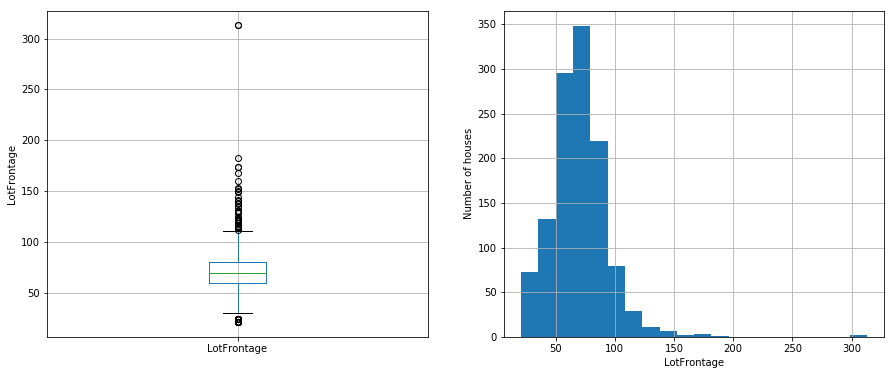

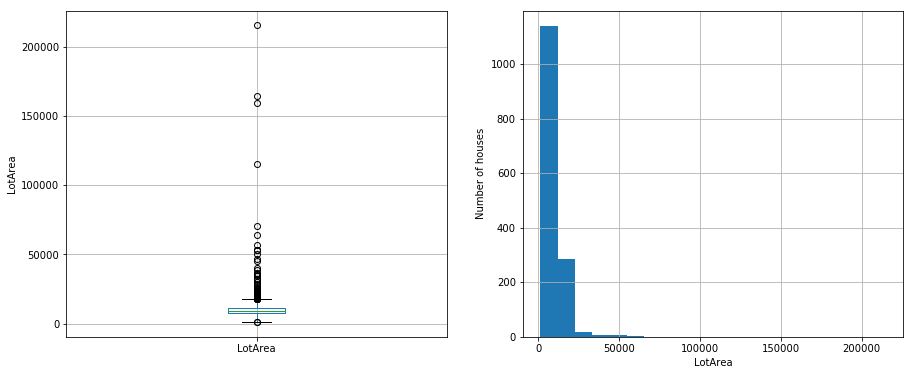

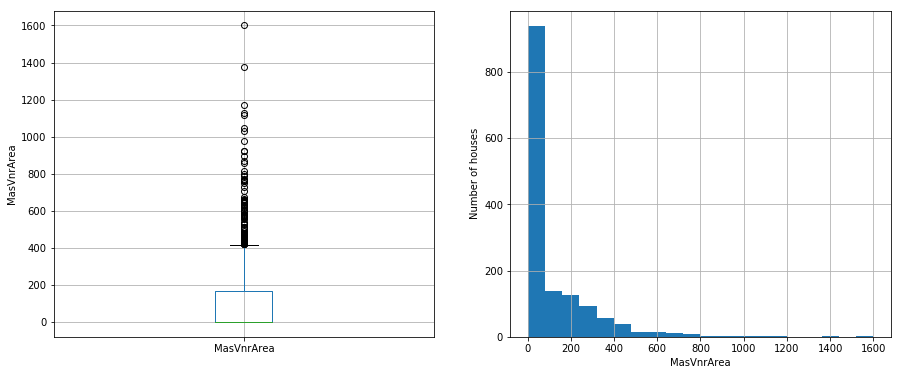

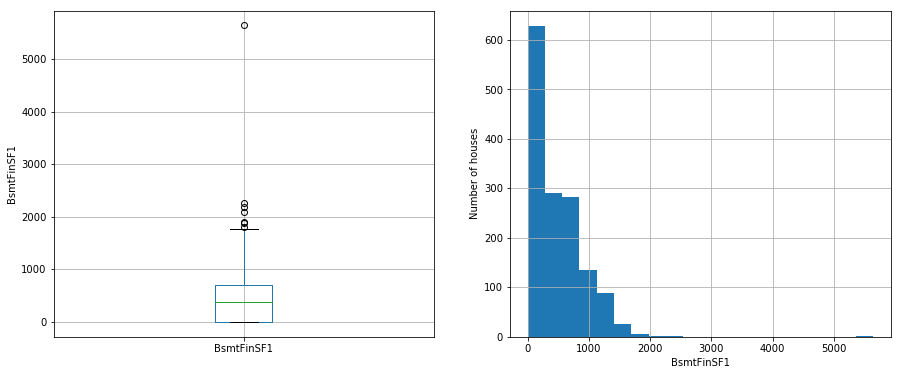

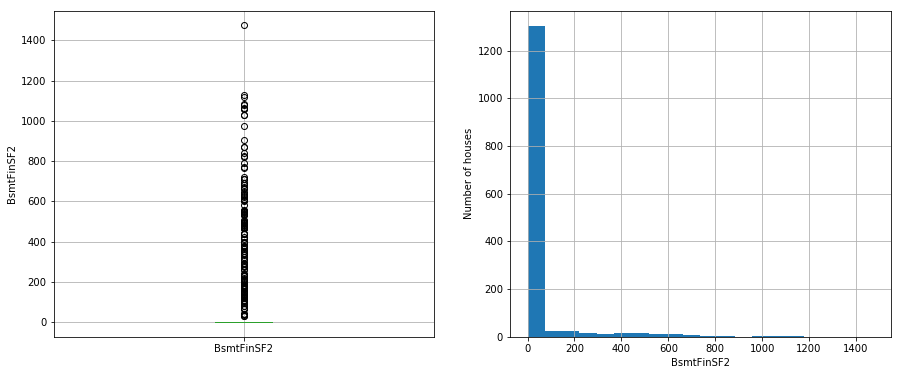

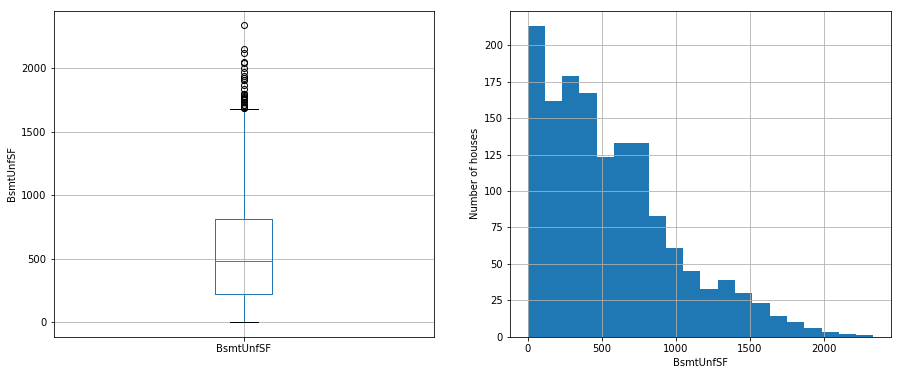

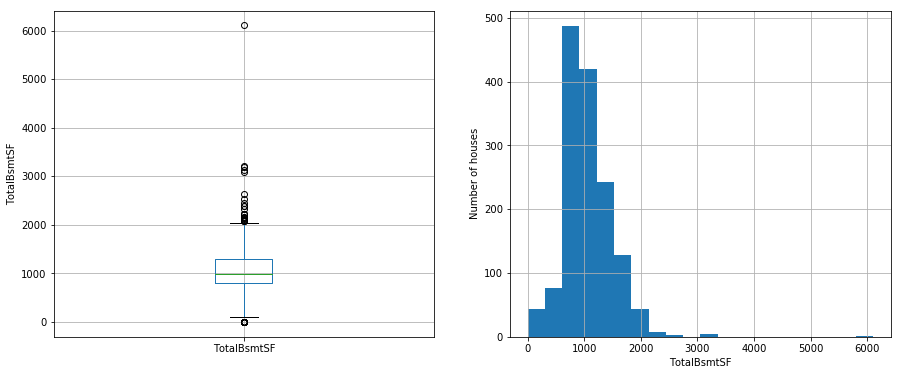

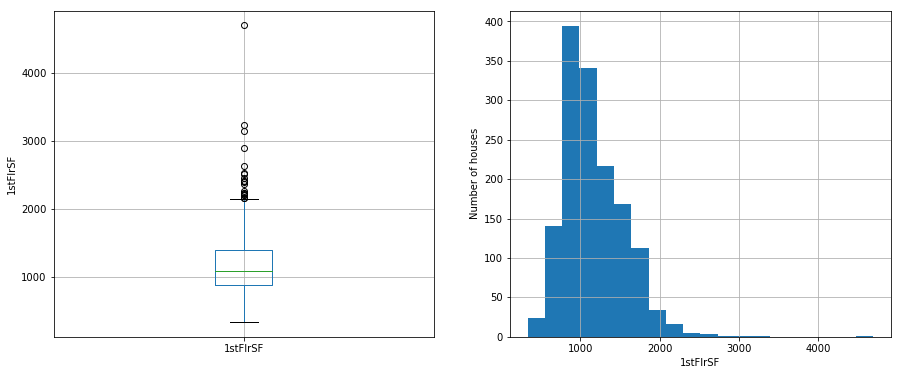

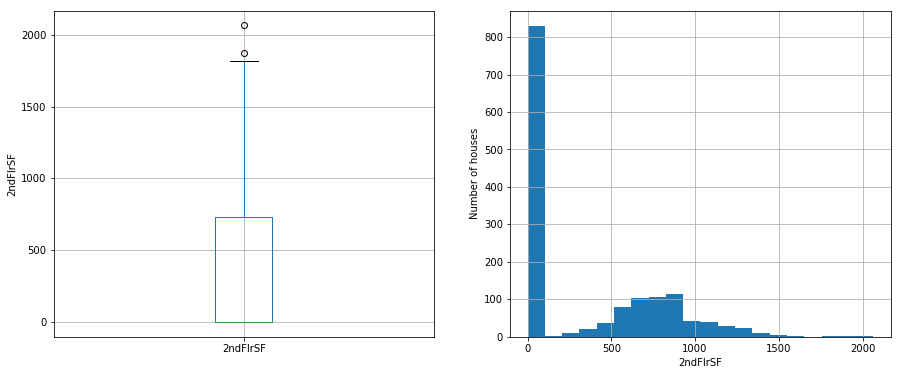

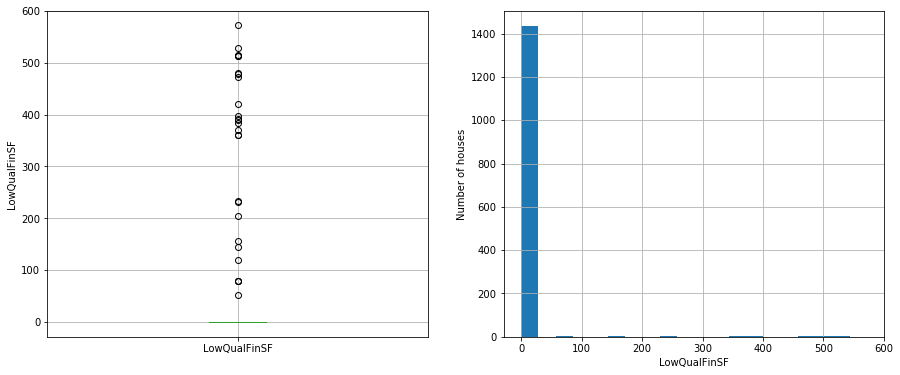

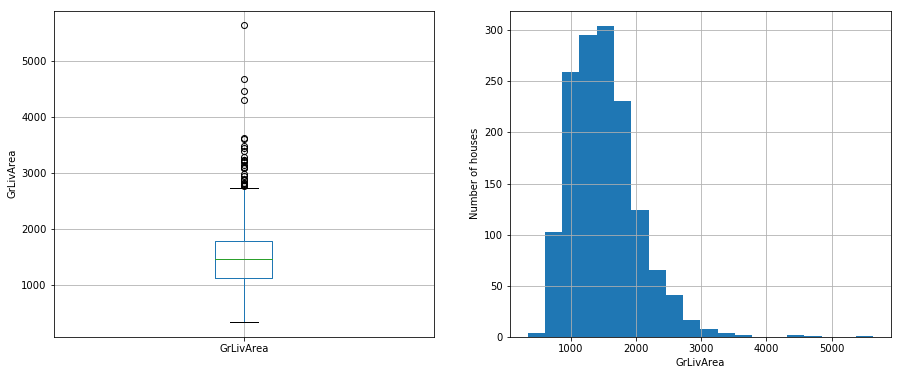

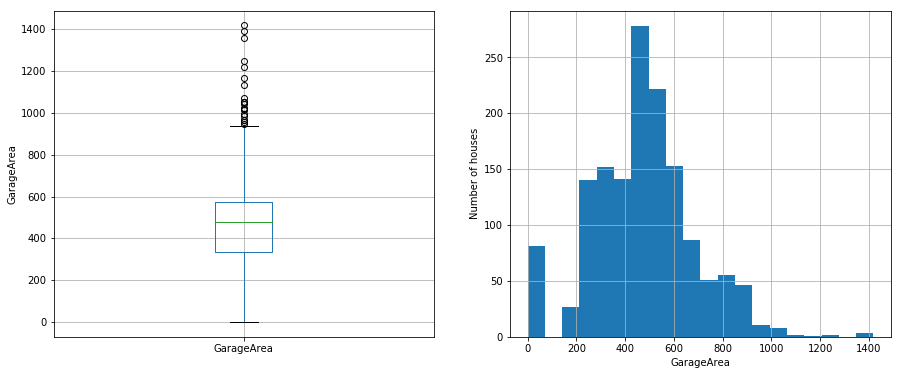

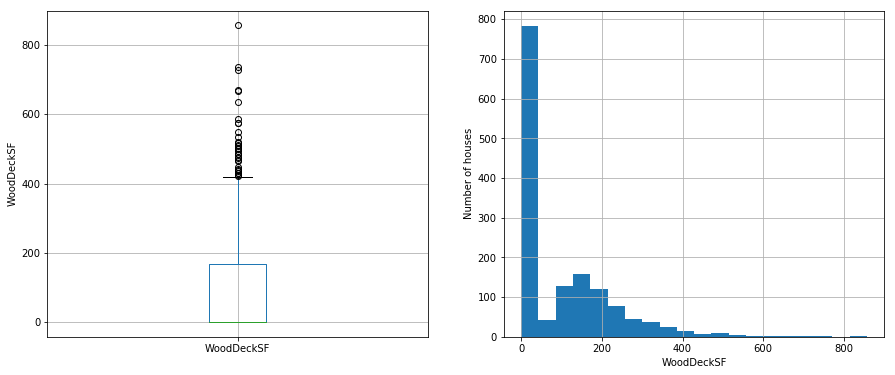

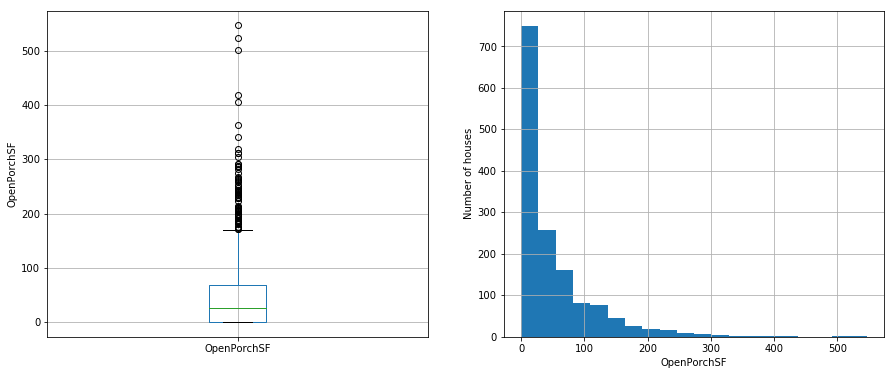

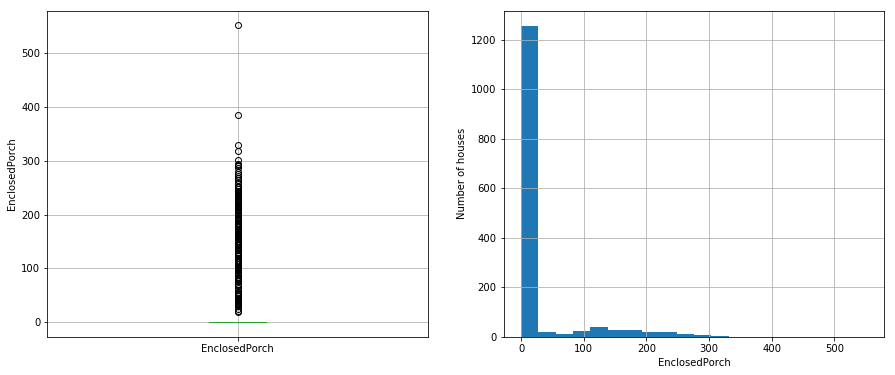

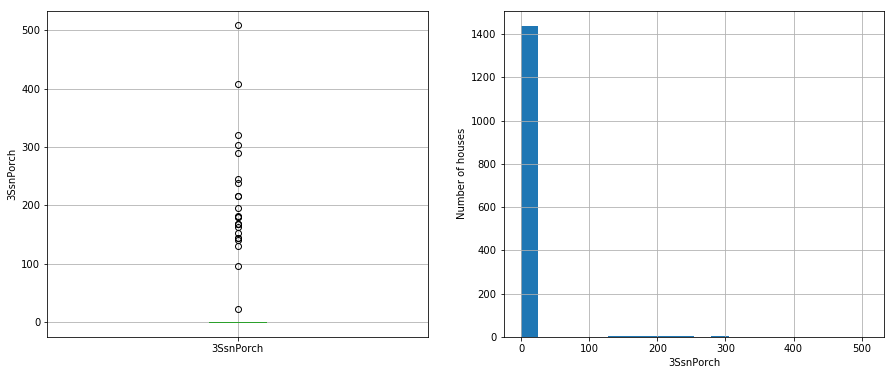

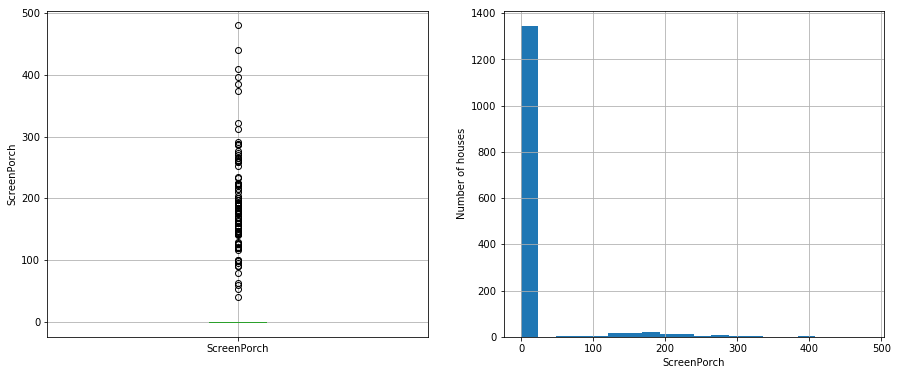

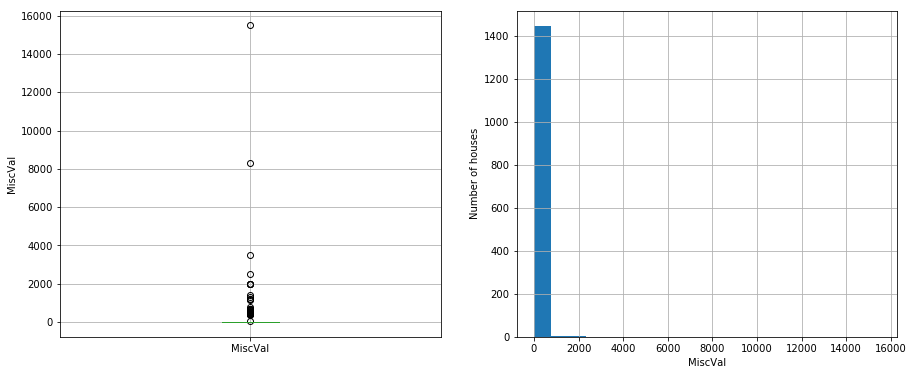

In [16]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. And in particular, I will use trees to find the right buckets onto which I will divide the variables.

#### Outliers in discrete variables

Now, let's identify outliers in numerical discrete variables. I will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

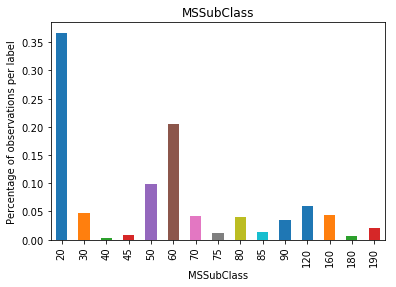

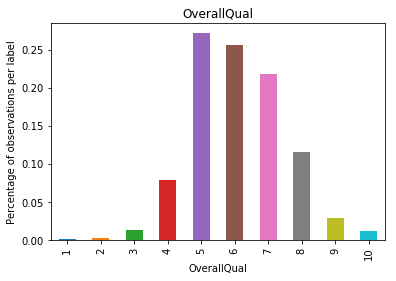

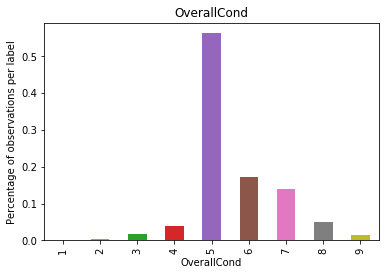

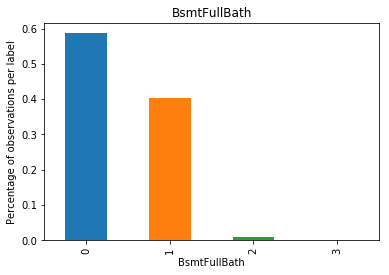

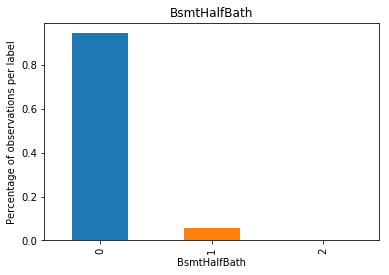

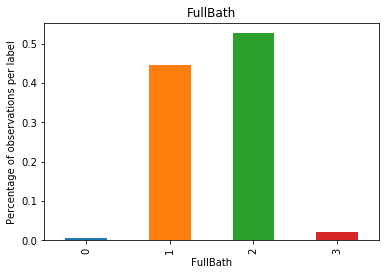

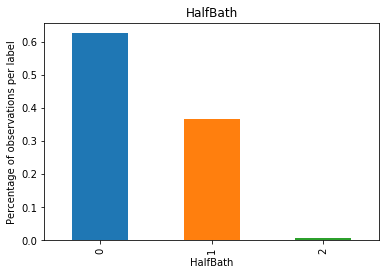

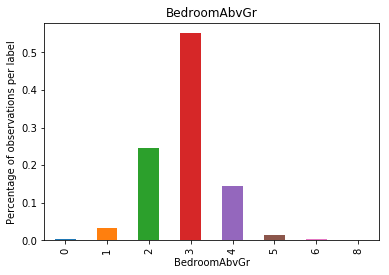

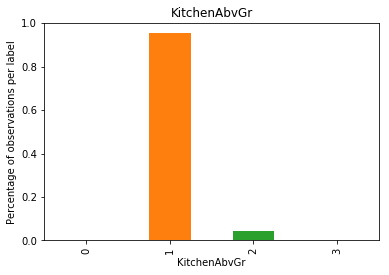

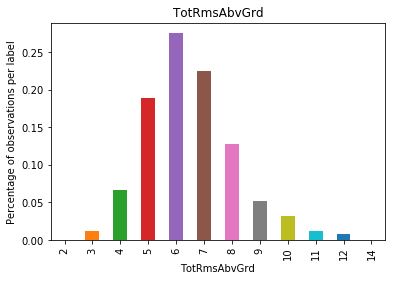

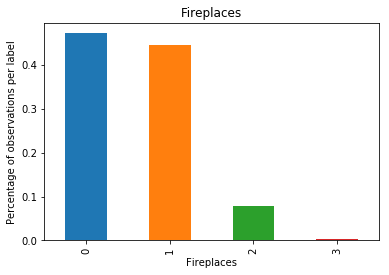

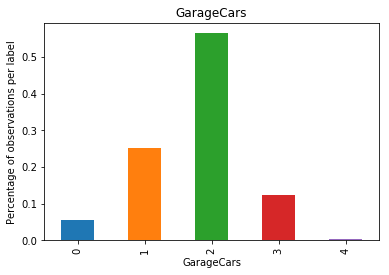

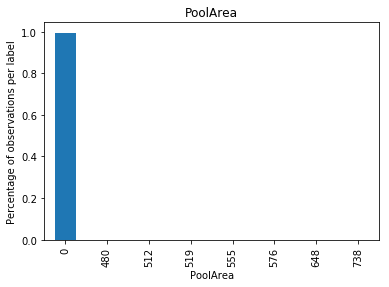

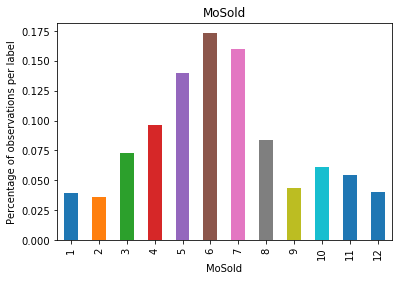

In [17]:
# outlies in discrete variables
for var in discrete:
    (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

Most of the discrete variables show values that are shared by a tiny proportion of houses in the dataset. For linear regression, this may not be a problem, but it most likely will be for tree methods.


#### Number of labels: cardinality

Let's go ahead now and examine our categorical variables. First I will determine whether they show high cardinality. This is, a high number of labels.

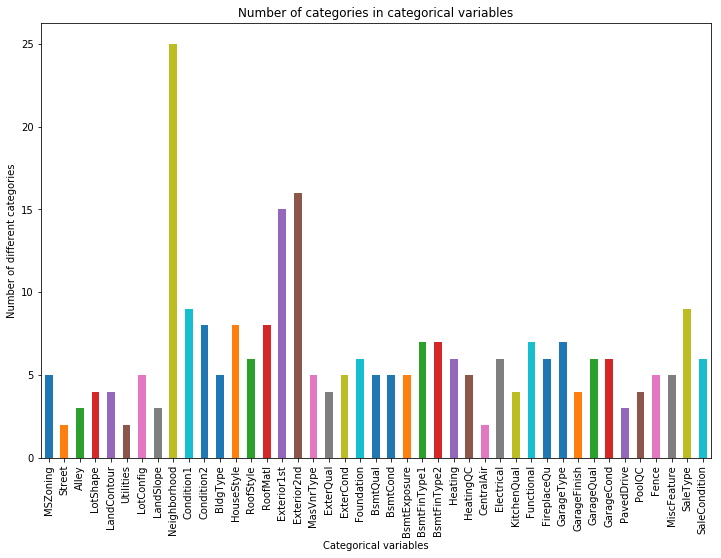

In [18]:
no_labels_ls = []
for var in categorical:
    no_labels_ls.append(len(data[var].unique()))
    
 
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality. That is good news!

### Separate train and test set

In [19]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.1,
                                                    random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

**Now we will move on and engineer the features of this dataset. The most important part for this course.**

### Bespoke feature engineering

First, let's extract information from temporal variables.
#### Temporal variables

First, we will create those temporal variables we discussed a few cells ago

In [20]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [21]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)
    submission = elapsed_years(submission, var)

In [22]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


Instead of years, now we have the amount of years passed since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [23]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)
submission.drop('YrSold', axis=1, inplace=True)

### Engineering missing values in numerical variables (section 5)
#### Continuous variables

In [24]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous as well:

# remove YrSold because it is no longer in our dataset
year_vars.remove('YrSold')

# examine percentage of missing values
for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.177321156773
MasVnrArea 0.00456621004566
GarageYrBlt 0.0563165905632


- LotFrontage and GarageYrBlt: These variables show more than 5% NA, so I create **additional variable with NA + median imputation**
- CMasVnrArea: Less than 5% NA so: **median imputation**

In [25]:
# add variable indicating missingness + median imputation
for df in [X_train, X_test, submission]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test, submission]:
    df['MasVnrArea'].fillna(X_train.MasVnrArea.median(), inplace=True)

#### Discrete variables

In [26]:
# print variables with missing data
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

There are no missing data in the discrete variables. Good, then we don't have to engineer them.

### Engineering Missing Data in categorical variables (section 6)

In [27]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.938356164384
MasVnrType 0.00456621004566
BsmtQual 0.0243531202435
BsmtCond 0.0243531202435
BsmtExposure 0.0251141552511
BsmtFinType1 0.0243531202435
BsmtFinType2 0.0251141552511
Electrical 0.00076103500761
FireplaceQu 0.472602739726
GarageType 0.0563165905632
GarageFinish 0.0563165905632
GarageQual 0.0563165905632
GarageCond 0.0563165905632
PoolQC 0.995433789954
Fence 0.814307458143
MiscFeature 0.961187214612


I will add a 'Missing' Label to all of them. If the missing data are rare, I will handle those together with rare labels in a subsequent engineering step.

In [28]:
# add label indicating 'Missing' to categorical variables

for df in [X_train, X_test, submission]:
    for var in categorical:
        df[var].fillna('Missing', inplace=True)

In [29]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [30]:
# check absence of null values
for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [31]:
# check absence of null values
submission_vars = []
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


There are a few variables in the submission dataset, that did not show NA in the training dataset. For these variables, and to be able to score them using machine learning algorithms, I will fill the NA with the median value.

In [32]:
# Fill NA with median value for those variables that show NA only in the submission set

for var in submission_vars:
    submission[var].fillna(X_train[var].median(), inplace=True)

### Outliers in Numerical variables (15)

In order to tackle outliers and skewed distributions at the same time, I suggested I would do discretisation. And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

In [33]:
def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmin(score_ls)]
    #print(score_ls, np.argmin(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    submission[var] =  tree_model.predict(submission[var].to_frame())

In [34]:
for var in numerical:
    tree_binariser(var)

In [35]:
X_train[numerical].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
930,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,136612.858407,264085.159722,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,182097.497627
656,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,184535.337349,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,182097.497627
45,167762.37606,158953.135556,242979.107639,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,182097.497627
1348,167762.37606,229056.903382,163654.383041,303758.906780,182044.330197,184535.337349,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,166268.000000,187252.10559,180574.090417,178797.429397,182097.497627
55,236725.29249,158953.135556,242979.107639,168932.967391,182044.330197,165782.797872,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,249923.400000,178797.429397,182097.497627


In [36]:
# let's explore how many different buckets we have now among our engineered continuous variables
for var in numerical:
    print(var, len(X_train[var].unique()))

LotFrontage 2
LotArea 2
MasVnrArea 2
BsmtFinSF1 2
BsmtFinSF2 13
BsmtUnfSF 8
TotalBsmtSF 2
1stFlrSF 2
2ndFlrSF 2
LowQualFinSF 2
GrLivArea 2
GarageArea 2
WoodDeckSF 14
OpenPorchSF 14
EnclosedPorch 10
3SsnPorch 7
ScreenPorch 8
MiscVal 4


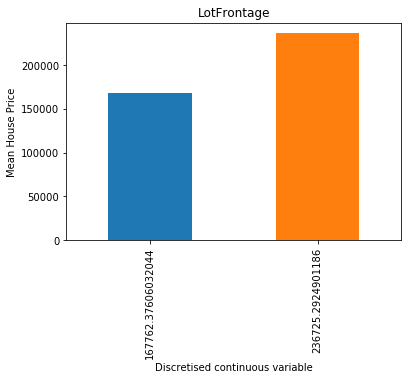

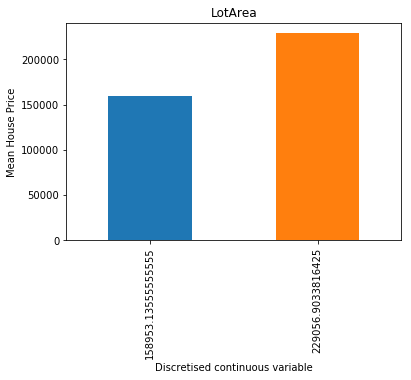

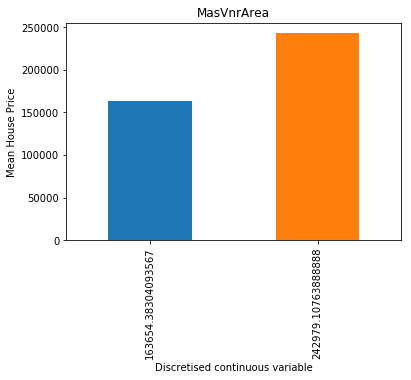

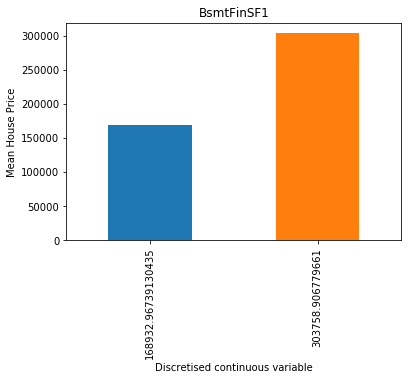

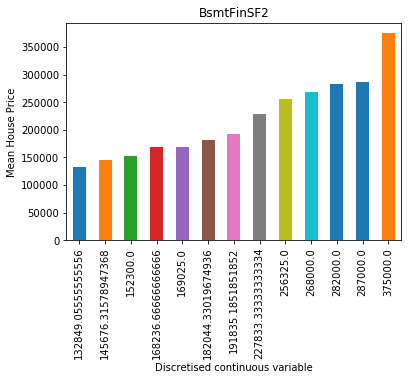

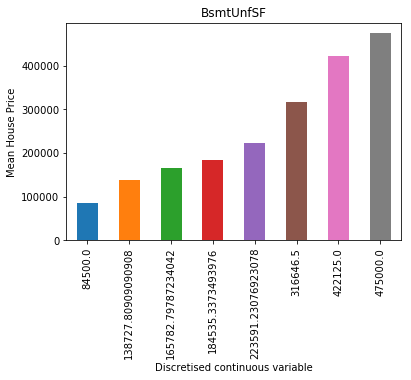

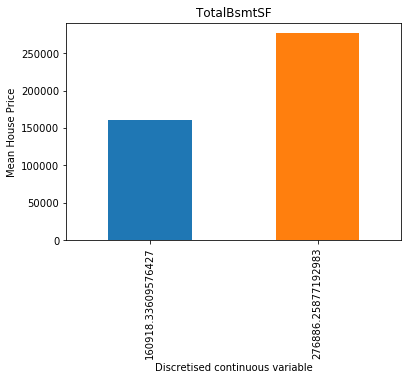

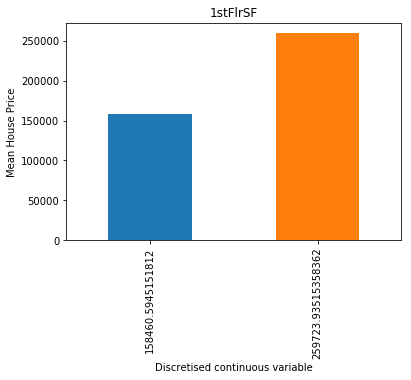

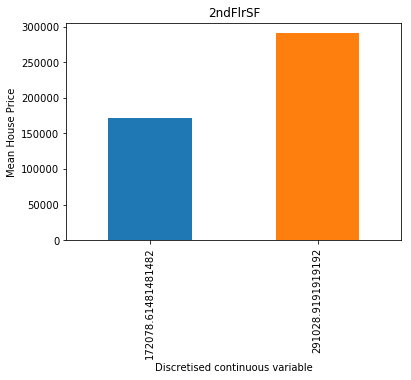

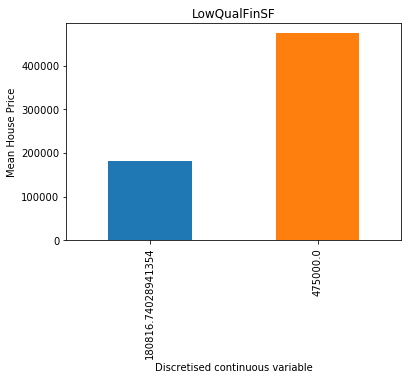

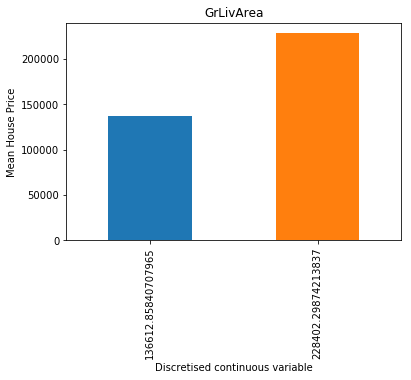

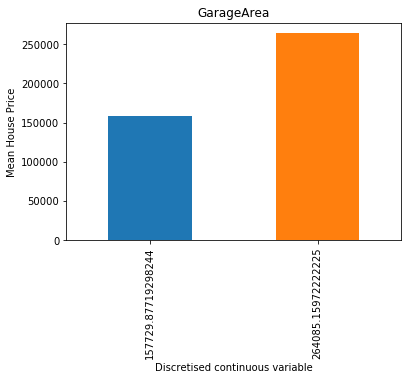

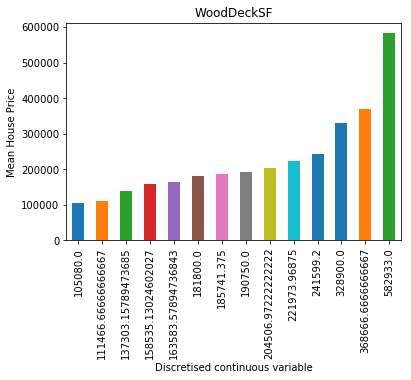

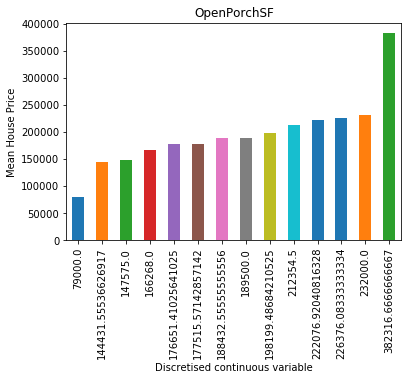

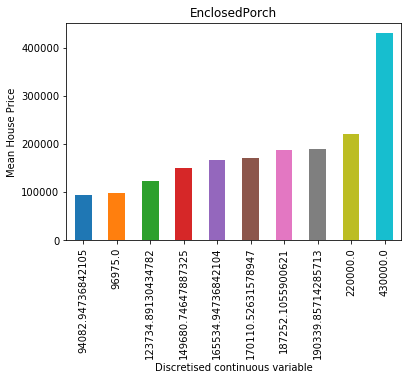

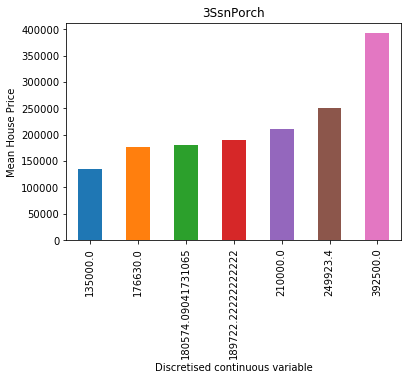

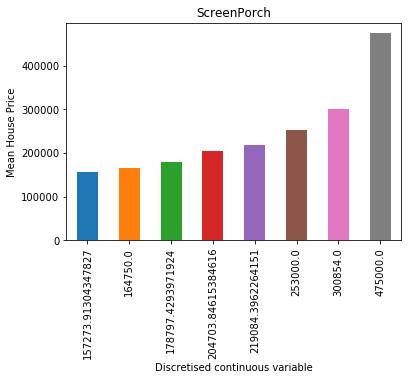

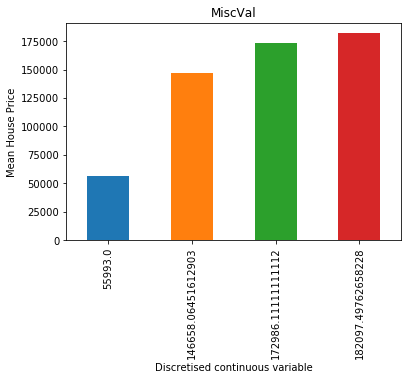

In [37]:
for var in numerical:
    X_train.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Mean House Price')
    plt.xlabel('Discretised continuous variable')
    plt.show()

We can see that the mean House Price value increases with the value of the bucket. This means we managed to create a monotonic distribution between the numerical variable and the target.

### Engineering rare labels in categorical and discrete variables (section 9)

In [38]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], 'Rare')

In [39]:
# the following vars in the submission dataset are encoded in different types
# so first I cast them as int, like in the train set

for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    submission[var] = submission[var].astype('int')

In [40]:
# find infrequent labels in categorical variables and replace by Rare
for var in categorical:
    rare_imputation(var)
    
# find infrequent labels in categorical variables and replace by Rare
# remember that we are treating discrete variables as if they were categorical
for var in discrete:
    rare_imputation(var)

In [41]:
# check that we haven't created missing values in the submission dataset
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)

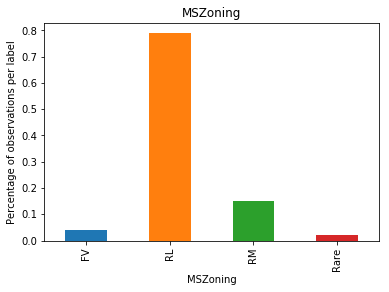

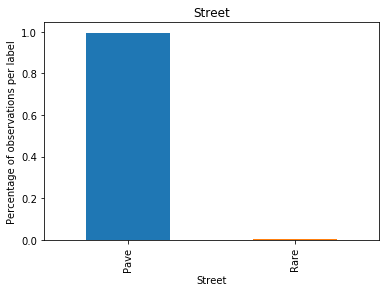

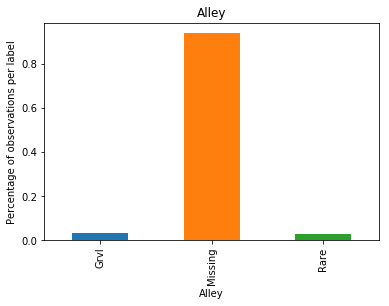

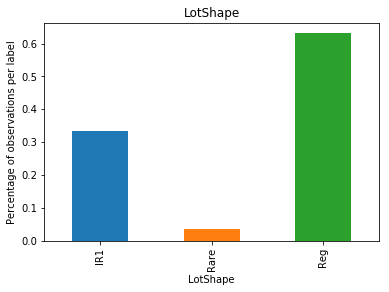

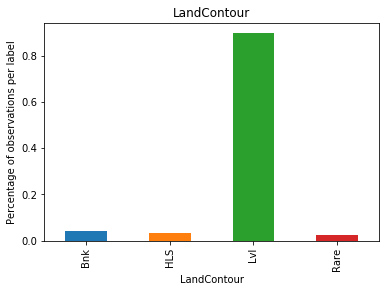

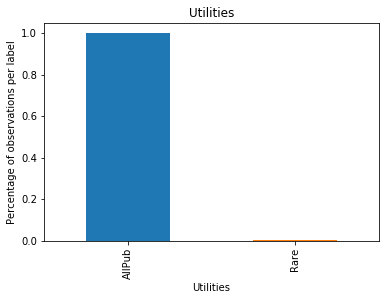

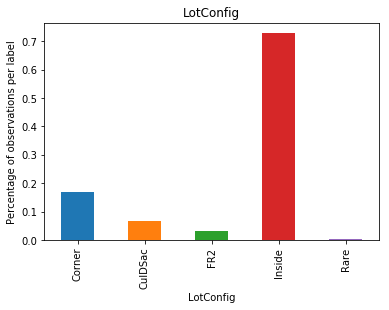

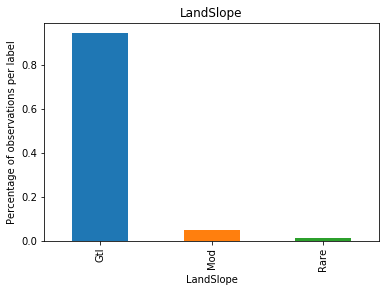

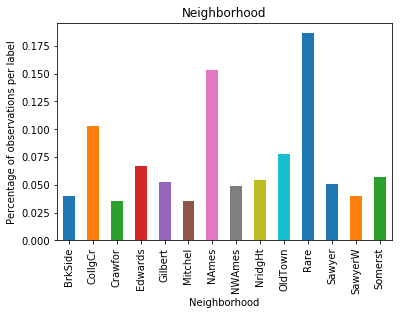

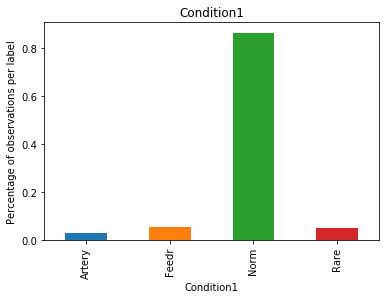

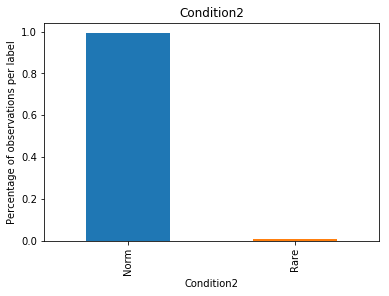

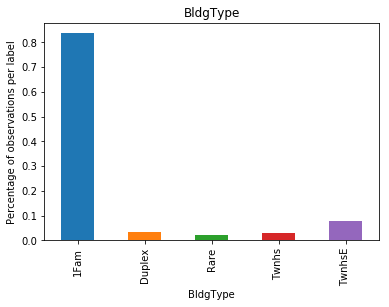

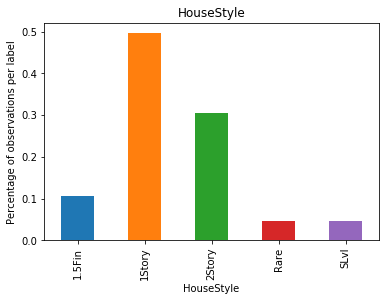

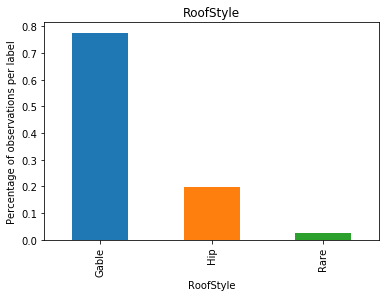

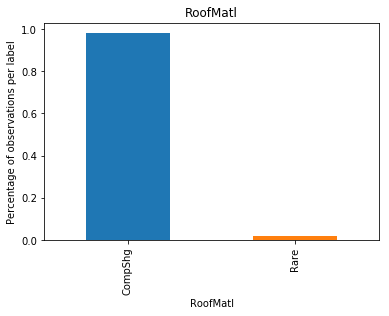

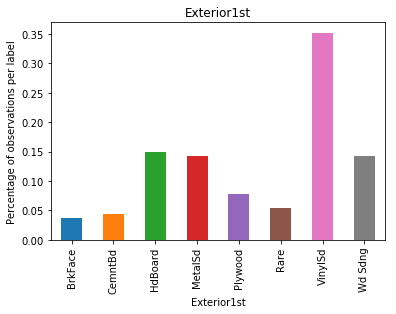

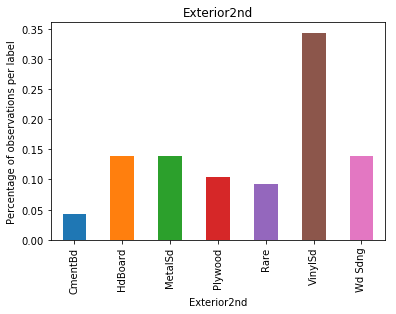

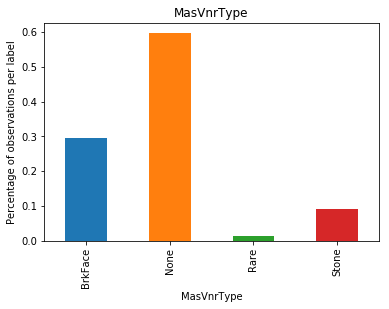

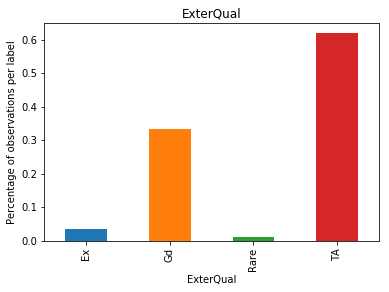

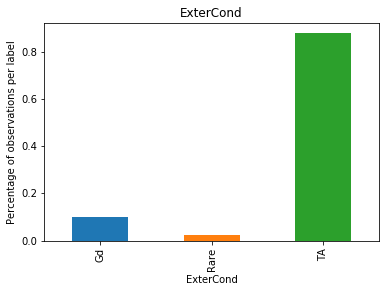

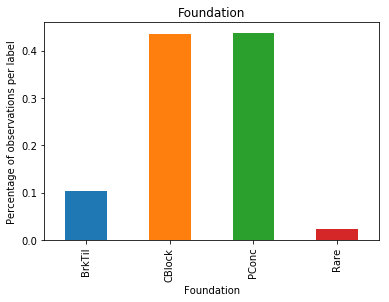

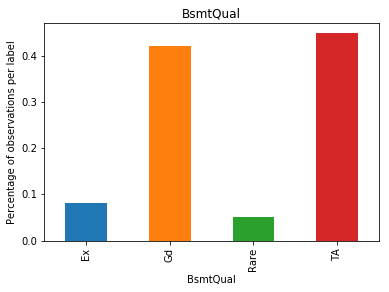

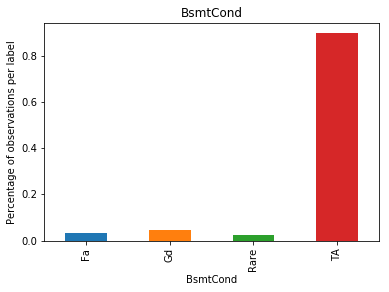

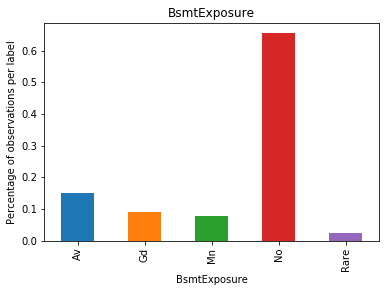

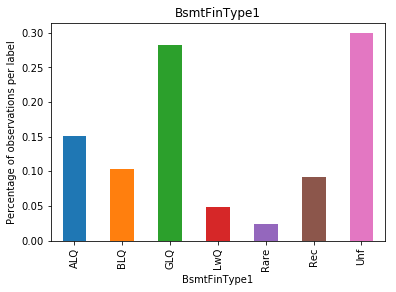

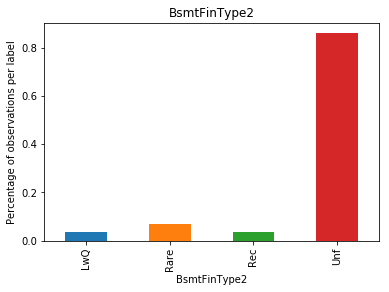

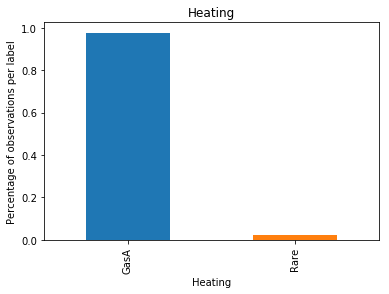

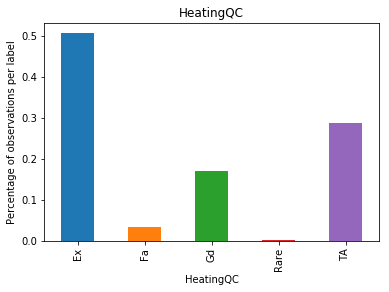

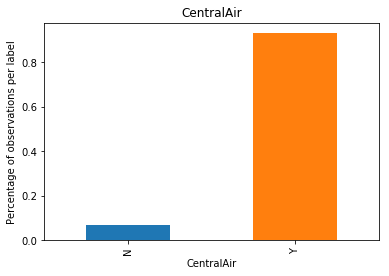

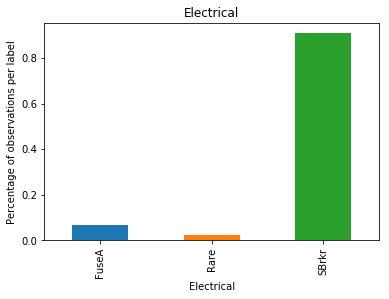

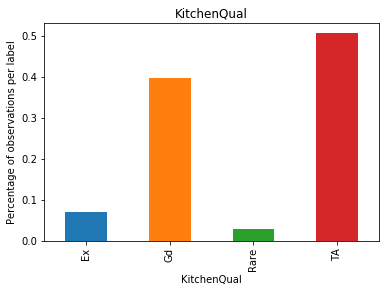

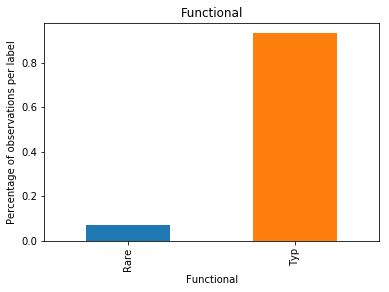

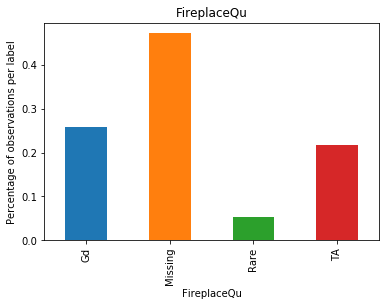

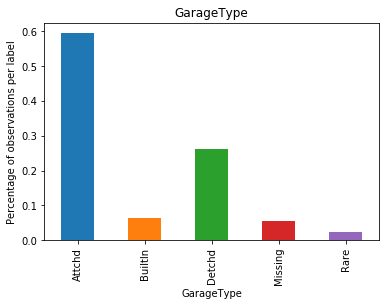

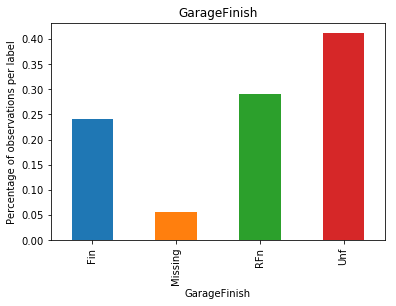

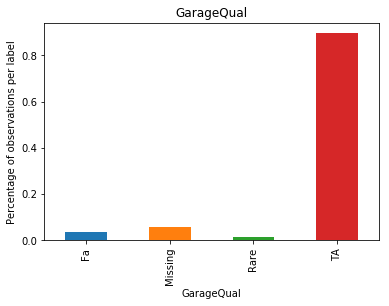

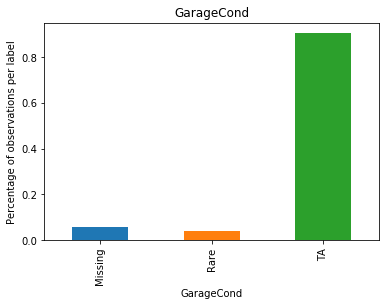

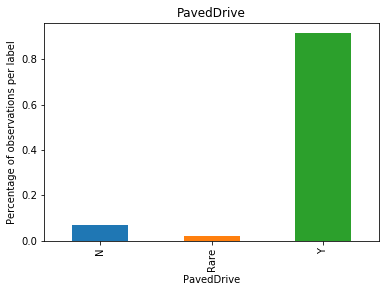

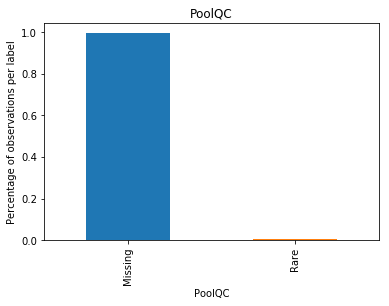

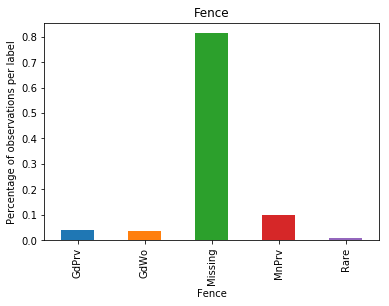

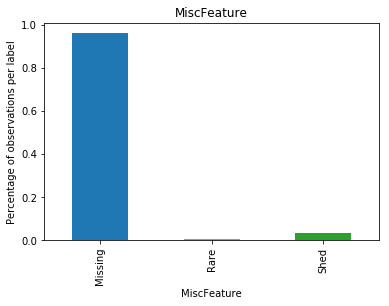

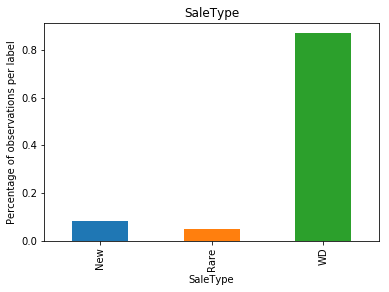

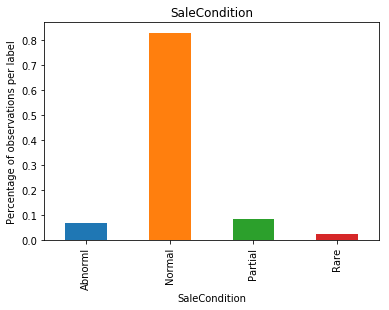

In [42]:
# let's check that it worked
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

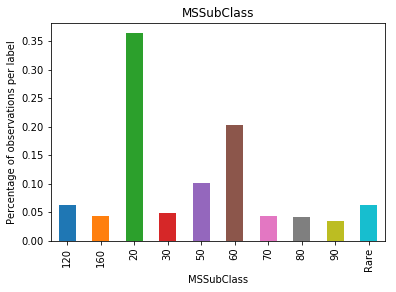

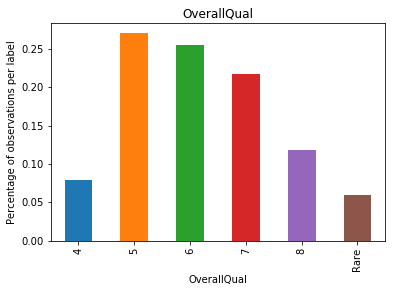

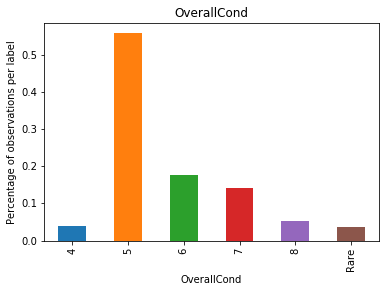

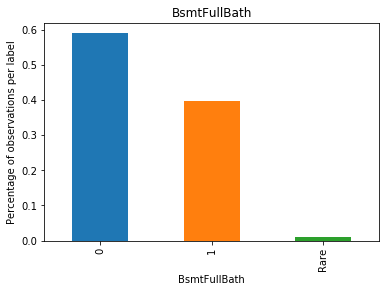

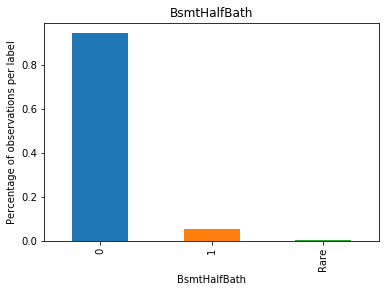

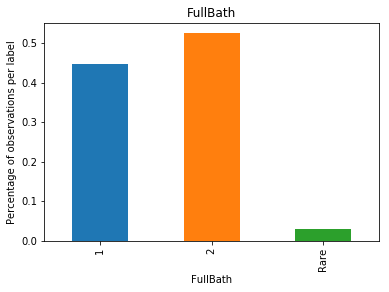

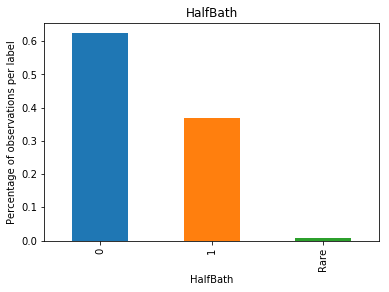

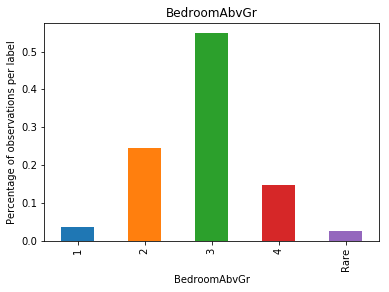

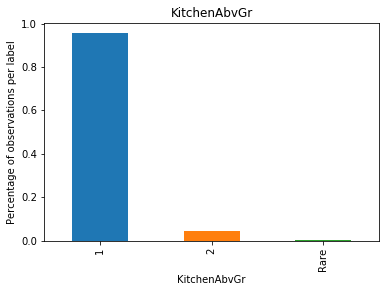

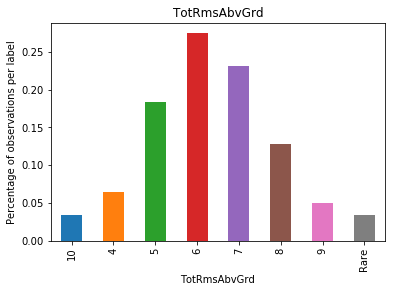

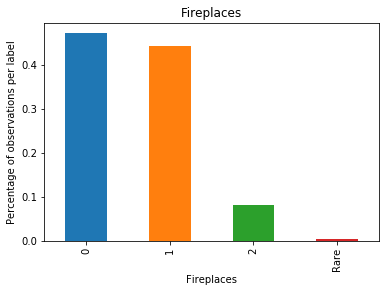

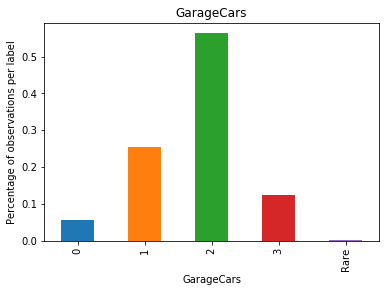

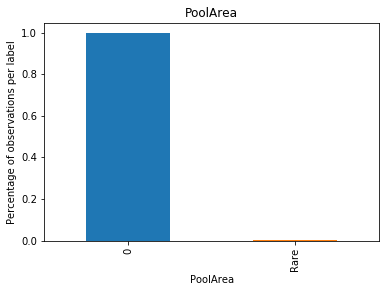

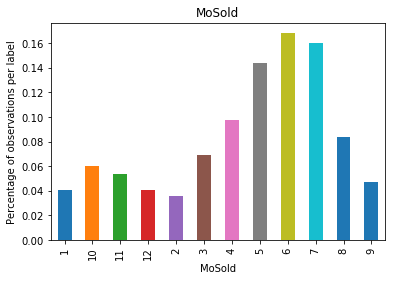

In [43]:
# let's check that it worked
for var in discrete:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

Fantastic, we have replaced infrequent labels in both categorical and numerical variables. We see the presence of the label rare in both!

### Encode categorical and discrete variables (section 10)

I will use target encoding for categorical variables. This way, the labels will be replaced by the mean of the SalePrice, and will remain in a similar scale to the one that now show our numerical variables.

In [44]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        submission[var] = submission[var].map(ordered_labels)

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

In [45]:
# sanity check: let's see that we did not introduce NA by accident
for var in X_train.columns:
    if var!='SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())

In [46]:
#let's inspect the dataset
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
930,931,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,229102.255814,181073.785225,176923.341336,179949.742534,203489.946939,184202.50044,181114.067536,185740.182894,176486.047546,273483.000000,203106.269126,2,2,171319.443683,179722.971296,215247.326134,216064.221239,155917.553571,163654.383041,231040.800000,184094.602253,225871.299130,203881.873188,183805.015293,203036.095960,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,136612.858407,165147.890464,181297.887994,212795.308696,162838.57265,181029.186111,183542.560606,213391.308429,195928.690789,183618.068684,141047.961353,141047.961353,202501.549872,2.0,239303.034810,309977.853659,264085.159722,187768.181664,188346.234454,186926.069109,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,187715.285981,182136.371338,182097.497627,184207.900000,173346.078671,175368.825368,201000,0,0
656,657,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,180454.298052,181073.785225,176923.341336,179949.742534,146653.696517,184202.50044,181114.067536,185740.182894,176486.047546,133745.805634,159751.766304,49,2,171319.443683,179722.971296,161838.040609,166403.519126,205447.897436,163654.383041,231040.800000,184094.602253,150529.160558,141171.125637,183805.015293,166205.981395,161723.106061,168932.967391,184463.10168,182044.330197,184535.337349,160918.336096,182115.031931,215075.475976,186569.561275,187320.733445,158460.594515,172078.614815,180816.740289,136612.858407,203574.293893,181297.887994,135514.882453,212163.63843,181029.186111,183542.560606,213391.308429,141752.929461,183618.068684,141047.961353,141047.961353,202501.549872,49.0,202789.618799,128360.834835,157729.877193,187768.181664,188346.234454,186926.069109,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,145283.748092,182136.371338,182097.497627,185207.736364,173346.078671,175368.825368,145500,0,0
45,46,200763.148148,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,164928.283474,180454.298052,181073.785225,176923.341336,179949.742534,315191.901408,184202.50044,181114.067536,182123.300971,176486.047546,294348.576923,203106.269126,5,5,219039.383142,179722.971296,148333.844920,148397.961538,205447.897436,242979.107639,371951.531915,184094.602253,225871.299130,327072.598131,183805.015293,166205.981395,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,228402.298742,203574.293893,181297.887994,212795.308696,162838.57265,158790.238390,183542.560606,324619.989011,161003.847645,183618.068684,212674.463918,228513.814159,202501.549872,5.0,202789.618799,184038.209459,157729.877193,187768.181664,188346.234454,186926.069109,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,187

We can see that the labels have now been replaced by the mean house price.

### Feature scaling (section 13)

In [47]:
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,736.230594,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,36.874429,23.031202,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,29.426180,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,0.177321,0.056317
std,422.410752,38808.314261,26199.490720,27202.168491,32578.624196,2894.262502,11596.886609,22203.246215,12496.527972,1202.064041,12252.421306,4473.563558,46324.135172,12378.889534,799.639940,14443.396437,22118.086370,55373.367775,25689.624796,30.424945,20.674420,18987.049945,9465.046408,31222.482231,29849.145703,34692.124836,32828.304387,55307.593633,11738.300408,40048.407098,54135.969770,18564.012040,31474.766214,37025.161496,38561.152257,8936.859617,12458.876505,26757.025792,43932.929977,7031.636148,35121.370816,20397.476096,19824.089401,42166.629312,31408.069863,8115.593269,45888.734488,19155.180393,1231.986901,43969.360794,23778.354096,18218.274540,11460.774121,53401.249548,39020.198392,9452.511123,38521.652511,38773.307482,39521.671622,24.168823,43879.853129,56100.658727,44014.821429,22988.130523,22934.186102,19330.485641,32056.720234,37326.620936,19655.245498,7426.510849,14425.004989,2097.293089,2097.293089,15505.675991,5456.509673,6464.119661,6799.785827,29337.716048,30218.520557,

We can see that because, we used the SalePrice target  to encode both our numerical continuous and discrete and categorical variables, all our variables show the mean house price as mean value. The standard deviation however, varies, following the nature of the original variable.

In [48]:
# let's create a list of the training variables
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

print('total number of variables to use for training: ', len(training_vars))

total number of variables to use for training:  80


In [49]:
training_vars

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [50]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

MinMaxScaler(copy=True, feature_range=(0, 1))

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

### Machine Learning algorithm building

**Note**

The distribution of SalePrice is also skewed, so I will fit the model to the log transformation of the house price.

Then, to evaluate the models, we need to convert it back to prices.

#### xgboost

In [51]:
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], np.log(y_test))]
xgb_model.fit(X_train[training_vars], np.log(y_train), eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('xgb train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))
print()
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

xgb train mse: 411750478.1958386
xgb train rmse: 20291.635670784122

xgb test mse: 1248980709.6125262
xgb test rmse: 35340.921176626485


This model shows some over-fitting. Compare the rmse for train and test.

#### Random Forests

In [52]:
rf_model = RandomForestRegressor(n_estimators=800, max_depth=6)
rf_model.fit(X_train[training_vars], np.log(y_train))

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('rf train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('rf test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

rf train mse: 598802726.1189518
rf train rmse: 24470.445973029422

rf test mse: 1427331220.8651788
rf test rmse: 37780.037332765816


This model shows some over-fitting. Compare the rmse for train and test.

#### Support vector machine

In [53]:
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred = SVR_model.predict(X_train[training_vars])
print('SVR train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('SVR train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = SVR_model.predict(X_test[training_vars])
print('SVR test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('SVR test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

SVR train mse: 6893198624.090748
SVR train rmse: 83025.28906357838

SVR test mse: 7462041362.741304
SVR test rmse: 86383.10808683203


#### Regularised linear regression

In [54]:
lin_model = Lasso(random_state=2909, alpha=0.005)
lin_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred = lin_model.predict(scaler.transform(X_train[training_vars]))
print('Lasso Linear Model train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('Lasso Linear Model train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = lin_model.predict(scaler.transform(X_test[training_vars]))
print('Lasso Linear Model test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('Lasso Linear Model test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

Lasso Linear Model train mse: 1141198152.8570888
Lasso Linear Model train rmse: 33781.62448517076

Lasso Linear Model test mse: 1564309979.8790731
Lasso Linear Model test rmse: 39551.358761477124


The best model is the Lasso, so I will submit only that one for Kaggle.

### Submission to Kaggle

In [55]:
# make predictions for the submission dataset
final_pred = pred = lin_model.predict(scaler.transform(submission[training_vars]))

In [56]:
temp = pd.concat([submission.Id, pd.Series(np.exp(final_pred))], axis=1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,1461,114441.226248
1,1462,133481.140066
2,1463,205078.922503
3,1464,203355.657256
4,1465,155992.304115


In [57]:
temp.to_csv('submit_housesale.csv', index=False)